In [22]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [24]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

data = pd.read_csv("/content/drive/MyDrive/us_car_data.csv")
data.head(20)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not been researched,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070
5,Chelan,Manson,WA,98831,2018,BMW,I3,Plug-in Hybrid Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,97,0,12,215122904,PUD NO 1 OF CHELAN COUNTY,53007960400,-120.153100,47.885505
6,Snohomish,Marysville,WA,98271,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,308,0,38,110992472,PUGET SOUND ENERGY INC,53061053102,-122.171385,48.104330
7,Snohomish,Edmonds,WA,98026,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,18,0,21,138909032,PUGET SOUND ENERGY INC,53061050300,-122.335685,47.803720
8,Thurston,Olympia,WA,98501,2019,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,25,0,22,272310279,PUGET SOUND ENERGY INC,53067010700,-122.896920,47.043535
9,Thurston,Lacey,WA,98503,2018,NISSAN,LEAF,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,151,0,22,235573929,PUGET SOUND ENERGY INC,53067011422,-122.828500,47.036460


In [25]:
data.isnull().sum()

County                   0
City                     0
State                    0
Postal Code              0
Model Year               0
Make                     0
Model                    0
Electric Vehicle Type    0
CAFV                     0
Electric Range           0
Base MSRP                0
Legislative District     0
DOL Vehicle ID           0
Electric Utility         0
2020 Census Tract        0
Longitude                0
latitude                 0
dtype: int64

There are no null values in the Dataset

In [26]:
data.shape

(134474, 17)

In [27]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134474 entries, 0 to 134473
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   County                 134474 non-null  object 
 1   City                   134474 non-null  object 
 2   State                  134474 non-null  object 
 3   Postal Code            134474 non-null  int64  
 4   Model Year             134474 non-null  int64  
 5   Make                   134474 non-null  object 
 6   Model                  134474 non-null  object 
 7   Electric Vehicle Type  134474 non-null  object 
 8   CAFV                   134474 non-null  object 
 9   Electric Range         134474 non-null  int64  
 10  Base MSRP              134474 non-null  int64  
 11  Legislative District   134474 non-null  int64  
 12  DOL Vehicle ID         134474 non-null  int64  
 13  Electric Utility       134474 non-null  object 
 14  2020 Census Tract      134474 non-nu

In [28]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Longitude,latitude
count,134474.000000,134474.000000,134474.000000,134474.000000,134474.000000,1.344740e+05,1.344740e+05,134474.000000,134474.000000
mean,98259.228520,2019.657250,74.730208,1451.396069,29.499911,2.063218e+08,5.303964e+10,-122.092668,47.467715
std,303.069045,3.001443,98.776037,9691.900720,14.786294,8.590842e+07,1.617660e+07,1.006671,0.615275
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10,-124.625140,45.583863
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.601798e+08,5.303301e+10,-122.405565,47.357985
50%,98122.000000,2021.000000,21.000000,0.000000,34.000000,2.059191e+08,5.303303e+10,-122.296385,47.613850
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308773e+08,5.305307e+10,-122.151665,47.715580
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10,-117.044370,48.996340


In [29]:
string_columns = data.select_dtypes(include=['object']).columns
for column in string_columns:
    print(column)

County
City
State
Make
Model
Electric Vehicle Type
CAFV
Electric Utility


In [30]:

new_data = data.loc[ (data["Electric Range"] >=200) ]
sliced_data = new_data[[ "County",
                          "City",
                          "State",
                          "Model Year",
                          "Make",
                          "Model",
                          "Electric Vehicle Type",
                          "Electric Range"
]]

sliced_data_reset = sliced_data.reset_index()
sliced_data_reset.head(10)

,index,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Electric Range
0,0,Thurston,Tumwater,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle,220
1,2,Snohomish,Snohomish,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle,266
2,3,King,Seattle,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle,322
3,4,Snohomish,Edmonds,WA,2013,TESLA,MODEL S,Battery Electric Vehicle,208
4,6,Snohomish,Marysville,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle,308
5,10,Thurston,Olympia,WA,2019,KIA,NIRO,Battery Electric Vehicle,239
6,11,Snohomish,Bothell,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle,291
7,15,Snohomish,Woodway,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle,215
8,18,Snohomish,Bothell,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle,291
9,19,Thurston,Tumwater,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle,215


In [31]:
sliced_data.shape

(31643, 8)

In [32]:
count_by_county = sliced_data_reset["County"].value_counts()
count_by_county.to_csv("count_by_county.csv")

In [33]:
count_by_county

King            17580
Snohomish        3381
Pierce           2220
Clark            1685
Thurston         1109
Kitsap            954
Spokane           685
Whatcom           680
Benton            386
Island            382
Skagit            366
Chelan            221
Jefferson         183
San Juan          182
Yakima            167
Clallam           166
Mason             152
Cowlitz           151
Kittitas          130
Lewis             111
Grant             108
Franklin          104
Grays Harbor       94
Walla Walla        76
Douglas            65
Klickitat          50
Okanogan           47
Whitman            42
Skamania           40
Pacific            35
Stevens            34
Wahkiakum          11
Pend Oreille       10
Asotin             10
Adams              10
Ferry               8
Columbia            4
Lincoln             3
Garfield            1
Name: County, dtype: int64

**Bar Chart of Electric Vehicle Adoption by each County Below:**

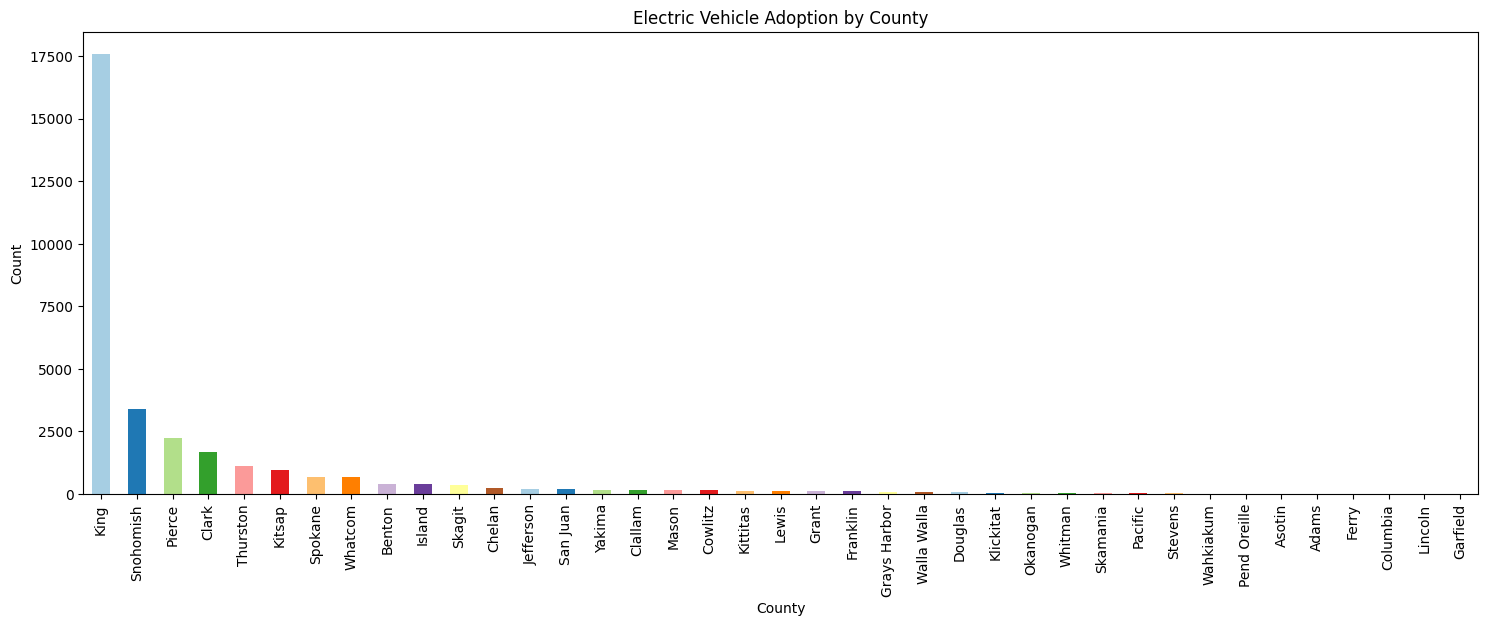

In [34]:
colors = sns.color_palette('Paired', len(count_by_county))

plt.figure(figsize=(18, 6))
count_by_county.plot(kind='bar', color=colors)
plt.xlabel("County")
plt.ylabel("Count")
plt.title("Electric Vehicle Adoption by County")
plt.show()

In [35]:
count_by_year = sliced_data_reset["Model Year"].value_counts().sort_index()
count_by_year.to_csv("count_by_year.csv")
count_by_year

2008      19
2010      20
2011       7
2012     127
2013     773
2014     657
2015    1069
2016    1634
2017    2951
2018    8442
2019    6639
2020    8972
2021     333
Name: Model Year, dtype: int64

**Line Chart of Electric Vehicle Adoption Trends by Year**

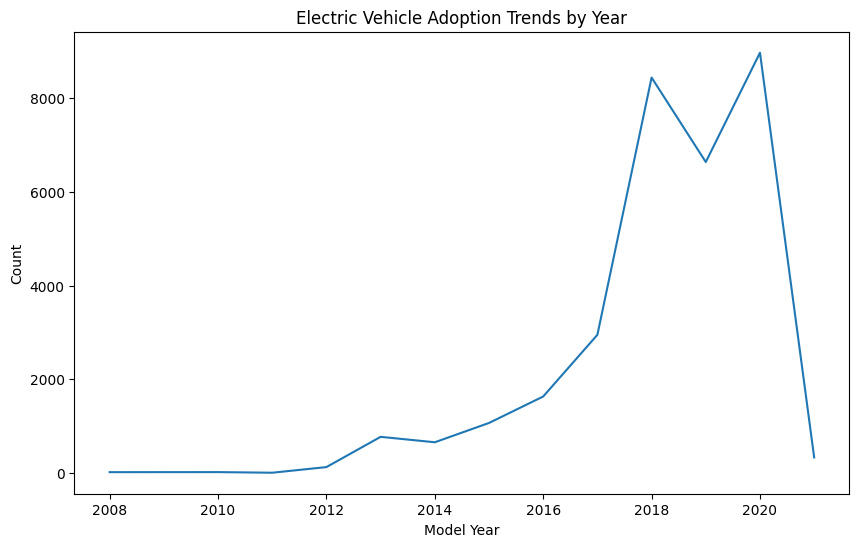

In [36]:
plt.figure(figsize=(10, 6))
count_by_year.plot(kind='line')
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.title("Electric Vehicle Adoption Trends by Year")
plt.show()

**Count of Electric Vehicle Types :**

In [37]:
vehicle_types = data["Electric Vehicle Type"].value_counts()
vehicle_types.to_csv("vehicle_types.csv")
vehicle_types


Battery Electric Vehicle              103424
Plug-in Hybrid Electric Vehicle        31050
Name: Electric Vehicle Type, dtype: int64

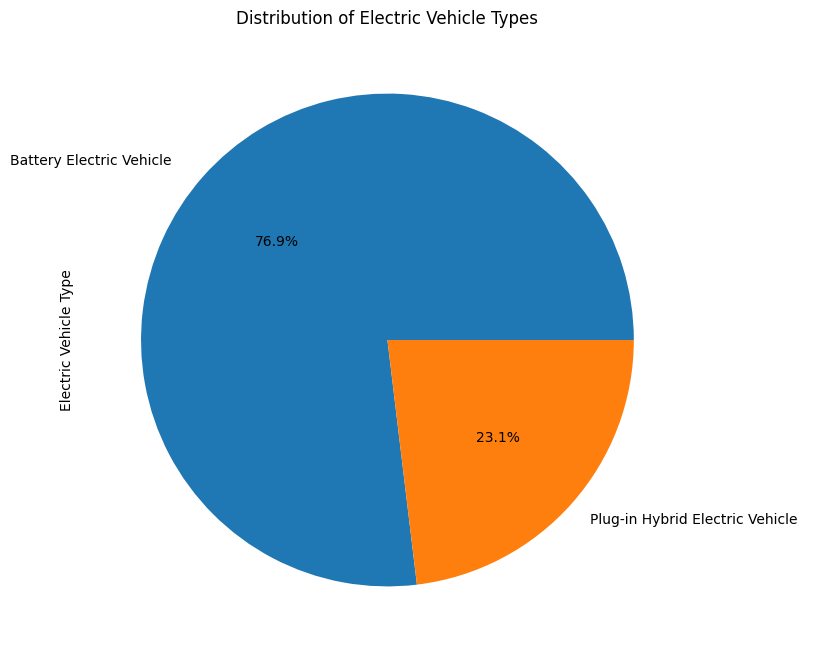

In [38]:
plt.figure(figsize=(8, 8))
vehicle_types.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Electric Vehicle Types")
plt.show()

**Electric Vehicle Range Statistics :**

In [44]:
max_range = sliced_data_reset["Electric Range"].max()
min_range = sliced_data_reset["Electric Range"].min()
avg_range = sliced_data_reset["Electric Range"].mean()

range_stats = pd.DataFrame({
    "Max Range": [max_range],
    "Min Range": [min_range],
    "Average Range": [avg_range]
})

range_stats.to_csv("range_stats.csv")
range_stats

,Max Range,Min Range,Average Range
0,337,200,239.917644


**Top 5 Popular Electric Vehicle Manufacturers :**

In [49]:
popular_makes = sliced_data_reset["Make"].value_counts().head(5)
popular_makes.to_csv("popular_makes.csv")
popular_makes

TESLA        25803
CHEVROLET     3561
KIA            835
AUDI           616
NISSAN         214
Name: Make, dtype: int64

**Bar Chart of Popular Electric Vehicle Manufacturers :**

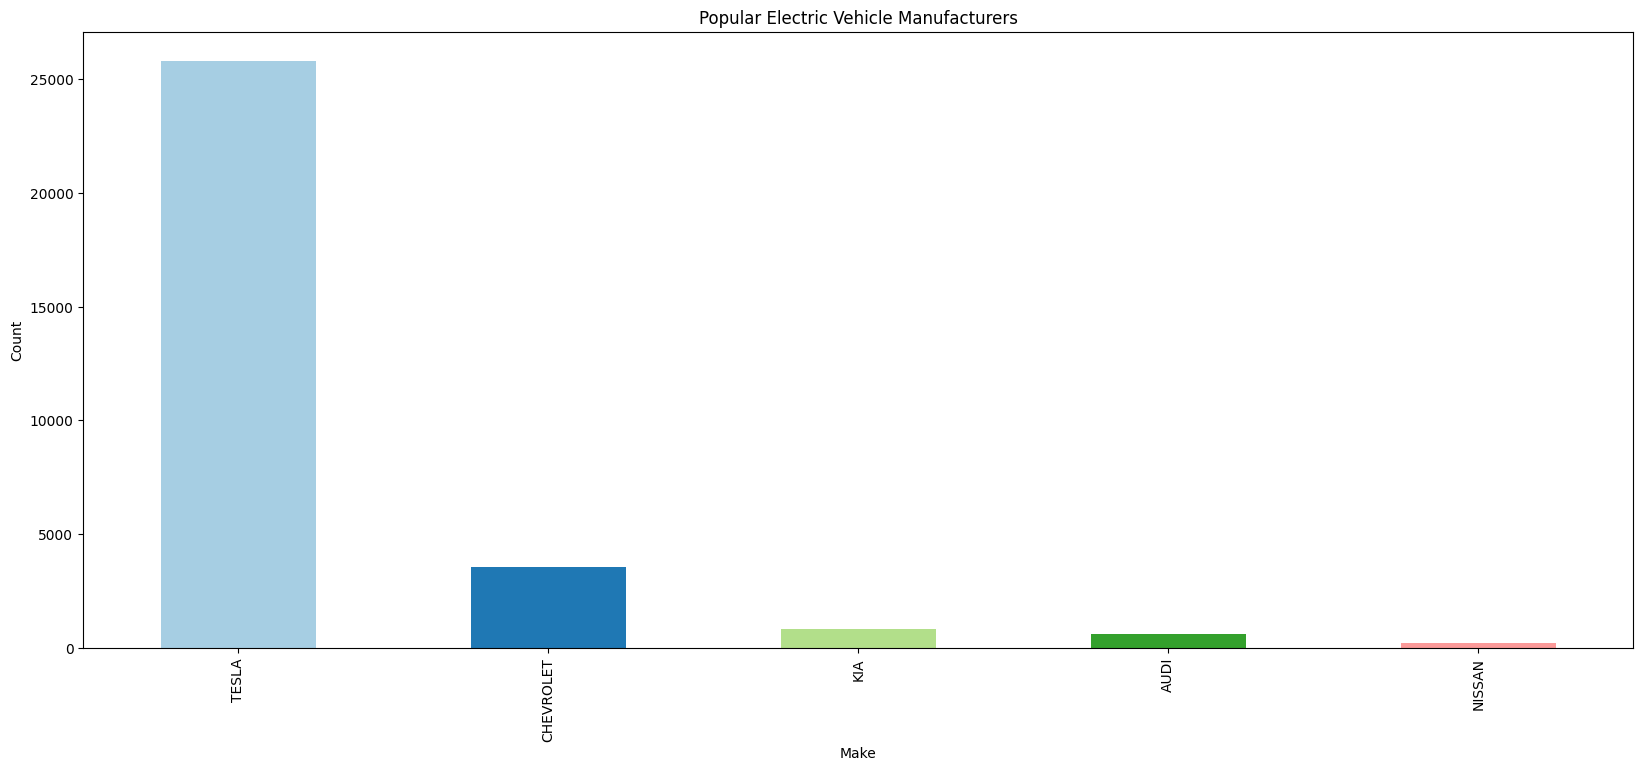

In [50]:
plt.figure(figsize=(20, 8))
popular_makes.plot(kind='bar', color =colors)
plt.xlabel("Make")
plt.ylabel("Count")
plt.title("Popular Electric Vehicle Manufacturers")
plt.show()

 **Above are the Top 5 Electric Vehicle Manufacturers   **